In [12]:
import pandas as pd
from src import util
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import numpy as  np
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPRegressor
import seaborn as sns
%matplotlib inline



100%|██████████| 6179/6179 [00:29<00:00, 209.38it/s]


In [ ]:
df = pd.read_csv("datasets/dataset.csv")
df = df.dropna()
df_,_=util.baseline_data(df)
df_200 = util.top200(df_,num=50)
df.index = list(range(df.shape[0]))
X,y=util.base44(df)
X["cout_smi"]=util.count_num_SMILES(df)

dfs = [
    X,
    util.count_ionized(df),
    util.count_elements(df),
    df_200,
]
X = pd.concat(dfs,axis=1)

X = util.convert_job(X,StandardScaler())
fps = [
    X,
    util.MACCS(df),
]
X = pd.concat(fps,axis=1)

In [16]:
X_base200 = util.convert_job(df_,StandardScaler())
X_base44,_ = util.baseline_data(df)
X_base44 = util.convert_job(X_base44,StandardScaler())

In [17]:
MLPR = MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=True, epsilon=1e-08,
             hidden_layer_sizes=(100, 100, 100,), learning_rate='constant',
             learning_rate_init=0.0016938817242064471, max_iter=10000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)
cv_results = cross_validate(MLPR, X_base200, y, cv=5, scoring='neg_mean_squared_error', return_estimator=True, n_jobs=-1)

In [18]:
-cv_results["test_score"]

array([0.30315889, 0.25321475, 0.29473106, 0.27411987, 0.33246306])

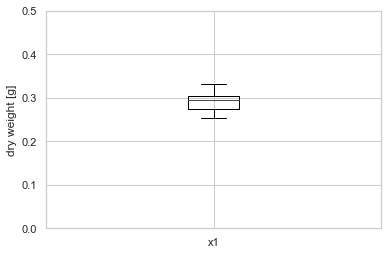

In [28]:
sns.set()
sns.set_style('whitegrid')
sns.set_palette('gray')

np.random.seed(2018)

x1 = np.random.normal(10, 2, 20)
x1 = -cv_results["test_score"]
# x2 = np.random.normal(15, 3, 20)
# x3 = np.random.normal(5, 1, 20)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.boxplot([x1], labels=["x1"])
# ax.set_xlabel('tissue')
ax.set_ylabel('dry weight [g]')
ax.set_ylim(0, 0.5)

plt.show()